Tasks: Following https://towardsdatascience.com/face-mask-detection-using-yolov5-3734ca0d60d8

1. Download Data Set and Roboflow it so we have the annotations
2. Import yolov5 and other libraries
3. Read in annotated images
4. Augment images with that from COCO dataset
4b: mtcnn find faces and creating bounding boxes
5. Training data
6. Inference

**Mounting Google drive to our notebook**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# please contact anitashen@berkeley.edu for access
# !unzip drive/MyDrive/21FA/DSS/Colab_Data/darknet_data.zip
# !unzip drive/MyDrive/21FA/DSS/Colab_Data/yolov5.zip

# Setup YoloV5/ Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import os

In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
!pip install -U -r yolov5/requirements.txt # install dependencies

# Reading Darknet Data and Changing Labels

Current our annotations are:

0 - Incorrect Mask Wearing
1 - Mask
2 - No Mask

Since our data doesn't include too many people with 0 label, we might have a lower test accuracy. To simplify the problem, we will change our annotations to 

0 - No Mask
1 - Mask and Incorrect Mask Wearing

In [ ]:
for folder in ['train', 'valid', 'test']:
    file_list = os.listdir(f'/content/drive/My Drive/21FA/DSS/Colab_Data/darknet_data/{folder}')
    for file in file_list:
        if not file.endswith('.txt'):
            continue
        with open(f'/content/drive/My Drive/21FA/DSS/Colab_Data/darknet_data/{folder}/{file}', 'r+') as f:
            lines = f.read()
            replaced = re.sub(r'0(?=\s\d+\.\d+){4}', '1', lines)
            replaced = re.sub(r'2(?=\s\d+\.\d+){4}', '0', lines)
            f.seek(0)
            f.write(replaced)
            f.truncate()

# Training Data with Yolov5

In [ ]:
# cd test
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (Tesla K80)


In [ ]:
!pip install opencv-python

In [ ]:
!apt-get update && apt-get install -y python3-opencv

python3 detect.py --source 0  # webcam
                          file.jpg  # image 
                          file.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/NUsoVlDFqZg'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

### Example inference. See what yoloV5 detects from random image

detect: weights=['yolov5s.pt'], source=darknet_data/example_images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-94-g47fac9f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/darknet_data/example_images/example_mask.jpg: 384x640 8 persons, 1 handbag, 1 tie, Done. (0.031s)
Speed: 0.6ms pre-process, 30.7ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp2


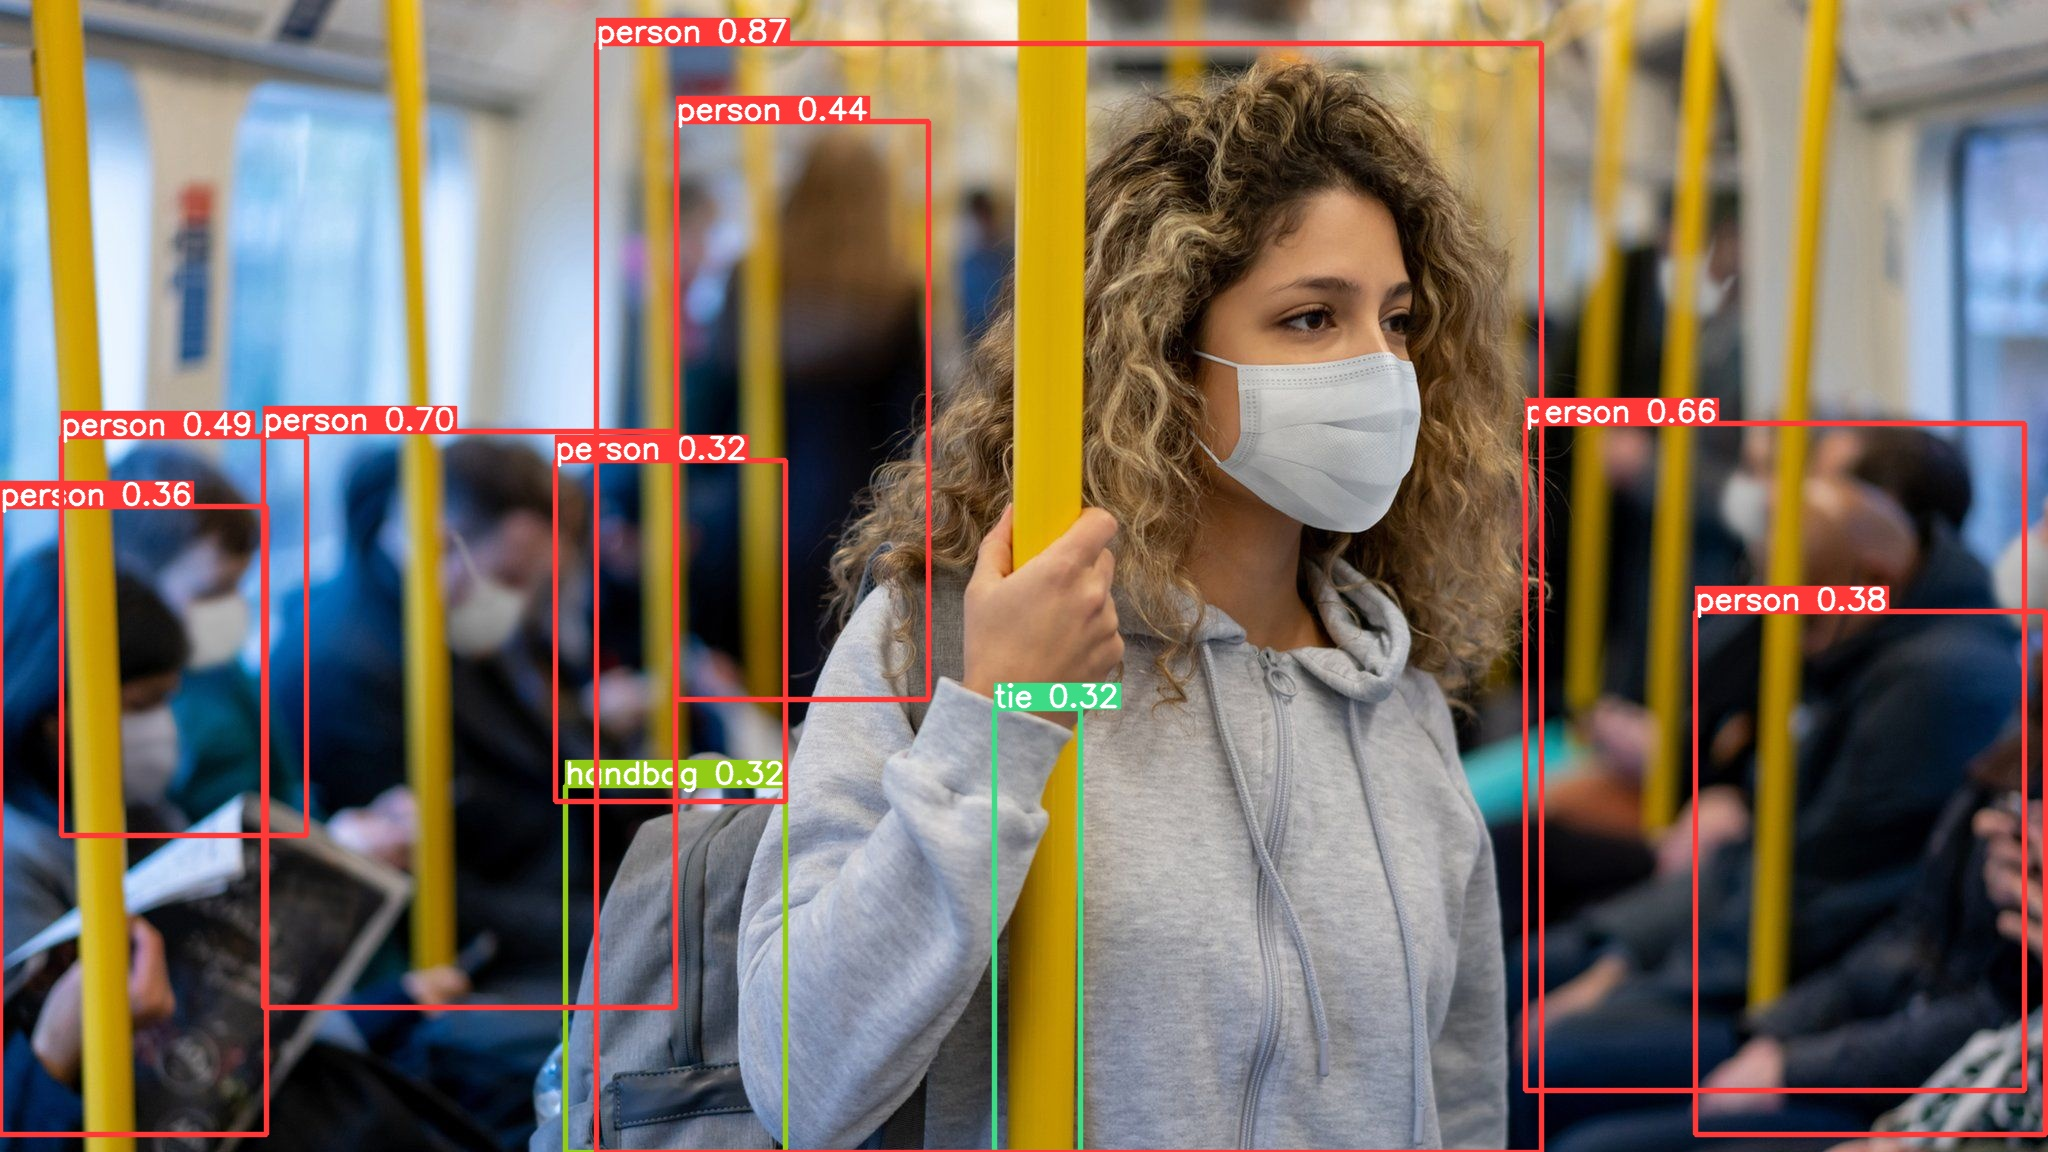

In [ ]:
!python yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source darknet_data/example_images 
Image(filename='yolov5/runs/detect/exp/example_mask.jpg', width=600)

## Calling train.py with the following parameters

img: input image size

batch: batch size

epochs: number of epochs

data: path to the data.yml file

cfg: model to choose among the preexisting in 📁models

weights: initial weights path, defaults to yolov5s.pt

name: renames output folder

device: Whether to train on cpu or gpu.

In [ ]:
!python yolov5/train.py --img 416 --batch 16 --epochs 3 --data darknet_data/data.yaml --weights yolov5s.pt --cache

In [ ]:
os.chdir("/content/drive/My Drive/21FA/DSS/Colab_Data/")

In [ ]:
!python yolov5/content/yolov5/train.py --img 416 --batch 16 --epochs 100 --data /content/drive/My\ Drive/21FA/DSS/Colab_Data/darknet_data/data.yaml --cfg yolov5s.yaml --weights '' --name robo4_epoch150_s --cache

# inference

In [ ]:
# !python yolov5/detect.py --weights yolov5s.pt --source darknet_data/test/maksssksksss2_png.rf.700792a344158bb1bacb209d0896e62a.jpg #--output inference/output --iou-thres 0.3 --conf-thres 0.6

In [ ]:
!python yolov5/content/yolov5/detect.py --weights yolov5/content/yolov5/runs/train/robo4_epoch150_s3/weights/last.pt --source darknet_data/test/maksssksksss2_png.rf.700792a344158bb1bacb209d0896e62a.jpg  --iou-thres 0.3 --conf-thres 0.6

detect: weights=['yolov5/content/yolov5/runs/train/robo4_epoch150_s3/weights/last.pt'], source=darknet_data/test/maksssksksss2_png.rf.700792a344158bb1bacb209d0896e62a.jpg, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.3, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/content/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-11-17 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/drive/My Drive/21FA/DSS/Colab_Data/darknet_data/test/maksssksksss2_png.rf.700792a344158bb1bacb209d0896e62a.jpg: 640x640 1 no_mask, 4 masks, Done. (0.034s)
Speed: 0.8ms pre-process, 34.2ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/content/yolov5/ru

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/robo4_epoch150_s/weights/last.pt --source darknet_data/test/maksssksksss839_png.rf.bd12dd31a71a2d586b35dfc2ae1f34ab.jpg --iou-thres 0.3 --conf-thres 0.6

detect: weights=['yolov5/runs/train/robo4_epoch150_s/weights/last.pt'], source=darknet_data/test/maksssksksss839_png.rf.bd12dd31a71a2d586b35dfc2ae1f34ab.jpg, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.3, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-94-g47fac9f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/darknet_data/test/maksssksksss839_png.rf.bd12dd31a71a2d586b35dfc2ae1f34ab.jpg: 640x640 3 masks, Done. (0.033s)
Speed: 0.6ms pre-process, 33.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp4


In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/robo4_epoch150_s/weights/last.pt --source darknet_data/test/maksssksksss701_png.rf.a6ce975deb8c18cf3491689b59a79db3.jpg --iou-thres 0.3 --conf-thres 0.6

detect: weights=['yolov5/runs/train/robo4_epoch150_s/weights/last.pt'], source=darknet_data/test/maksssksksss701_png.rf.a6ce975deb8c18cf3491689b59a79db3.jpg, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.3, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-94-g47fac9f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/darknet_data/test/maksssksksss701_png.rf.a6ce975deb8c18cf3491689b59a79db3.jpg: 640x640 Done. (0.033s)
Speed: 0.7ms pre-process, 33.3ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp6


# Below two cells help us write our new yolov5 folder to a zip and upload to drive

We need this in order to save the model outputs 

In [ ]:
!cp -r 'yolov5_epoch100.zip' /content/drive/MyDrive/21FA/DSS/Colab_Data

cp: 'yolov5_epoch100.zip' and '/content/drive/MyDrive/21FA/DSS/Colab_Data/yolov5_epoch100.zip' are the same file


In [ ]:
!zip -r /content/yolov5_epoch100.zip . -i /content/yolov5

Scanning files .
	zip warning: zip file empty


In [ ]:
!python yolov5/content/yolov5/val.py --data darknet_data/data.yaml --weights yolov5/content/yolov5/runs/train/robo4_epoch150_s3/weights/last.pt

val: data=darknet_data/data.yaml, weights=['yolov5/content/yolov5/runs/train/robo4_epoch150_s3/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/content/yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /content/drive/My Drive/21FA/DSS/Colab_Data/yolov5/content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2021-11-17 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients
val: Scanning 'dark

In [ ]:
import imghdr

for filename in os.scandir('darknet_data/test'):
  if imghdr.what(filename.path) == 'jpeg':
    curr_file = filename.path
    !python yolov5/content/yolov5/detect.py --weights yolov5/content/yolov5/runs/train/robo4_epoch150_s3/weights/last.pt --source $curr_file  --iou-thres 0.3 --conf-thres 0.6

detect: weights=['yolov5/content/yolov5/runs/train/robo4_epoch150_s3/weights/last.pt'], source=darknet_data/test/maksssksksss330_png.rf.d54e552bd59851cd58d199313ec7b983.jpg, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.3, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/content/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-11-17 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/drive/My Drive/21FA/DSS/Colab_Data/darknet_data/test/maksssksksss330_png.rf.d54e552bd59851cd58d199313ec7b983.jpg: 640x640 4 masks, Done. (0.033s)
Speed: 0.7ms pre-process, 33.5ms inference, 18.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/content/yolov5/runs/det

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c08bb9f0-ac53-489c-9a5d-19078b34659f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>